In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np

In [2]:
electric = pd.read_csv('~/Downloads/Full+Eletric+Interval+042016.csv')

In [3]:
pc = pd.read_excel('~/Downloads/SIMS_Property_List_4-6-2016_Revised.xlsx')

### Codes

In [7]:
codes = pd.Series([b[0] for b in electric['Meter'].str.split()])
unicodes = codes.unique()
unicodes = pd.Series(unicodes)

### Ages

In [206]:
agelst = []

for i in unicodes:
    agelst.append(pc[pc['Property Code'].isin([i])]['Year Constructed'])
age = pd.DataFrame(agelst).sum(axis=1)
age = age.reset_index(drop=True)

### Areas

In [205]:
arealst = []
for b in unicodes:
    arealst.append(pc[pc['Property Code'].isin([b])]['FCIM Gross Area'])
area = pd.DataFrame(arealst).sum(axis=1)
area = area.reset_index(drop=True)

### Cumulative Usages

In [204]:
clst = []
for i in unicodes:
    #for each unique code, find its Usage value in master df and add them all together, then append to list
    clst.append(electric.Usage[codes.isin([i])].sum())

### Full Building Names

In [203]:
namelst = []
for i in unicodes:
    namelst.append(pc[pc['Property Code'].isin([i])]['Property Name'])
namelst
name = pd.DataFrame(namelst)
name = name.replace(np.nan, '', regex=True)
name = name.reset_index(drop=True)
name =name.sum(axis=1)

### Normalized Usage

In [201]:
nusage = clst/area

In [51]:
data = {'Code': unicodes,'Building': name, 'Usage': clst, 'Area': area, 'Year': age, 'Normalized Usage': nusage}

In [52]:
df = pd.DataFrame(data)

In [53]:
df = df[df.Year != 0]

## All buildings

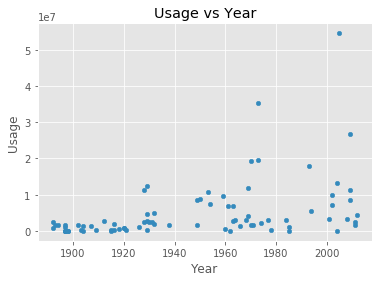

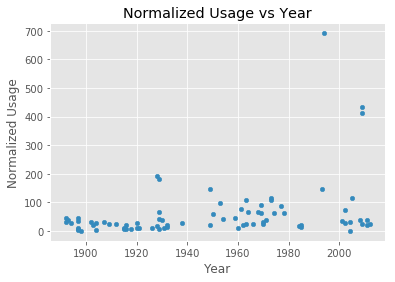

In [88]:
df.plot(x='Year', y='Usage', kind='scatter')
plt.title('Usage vs Year')
df.plot(x='Year', y='Normalized Usage', kind='scatter')
plt.title('Normalized Usage vs Year')

## Dorms

In [63]:
dormpc = pc[pc['Building Use'].str.contains('Dorm', na=False)]
dormpc
dormlst = []
for i in dormpc['Property Code']:
    dormlst.append(i)

In [200]:
dormdf = df[df.Code.isin(dormlst)]
dormdf= dormdf.reset_index(drop=True)

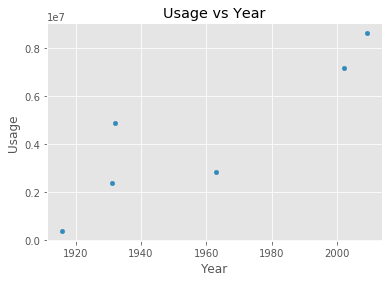

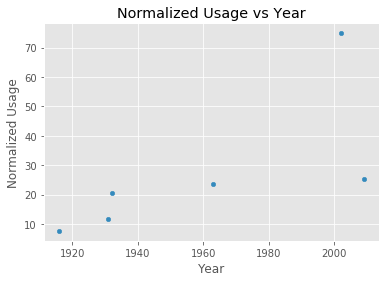

In [85]:
dormdf.plot(x='Year', y='Usage', kind='scatter')
plt.title('Usage vs Year')
dormdf.plot(x='Year', y='Normalized Usage', kind='scatter')
plt.title('Normalized Usage vs Year')

## Labs

In [71]:
labpc = pc[pc['Building Use'].str.contains('Lab', na=False)]
labpc
lablst = []
for i in labpc['Property Code']:
    lablst.append(i)

In [199]:
labdf = df[df.Code.isin(lablst)]
labdf = labdf.reset_index(drop=True)

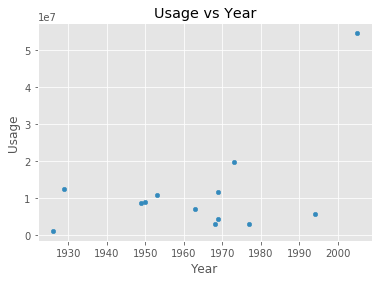

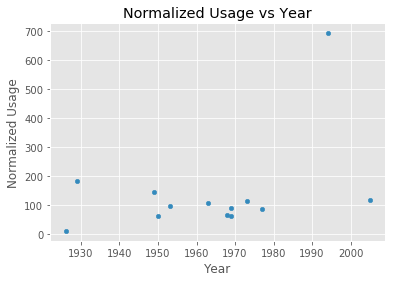

In [82]:
labdf.plot(x='Year', y='Usage', kind='scatter')
plt.title('Usage vs Year')
labdf.plot(x='Year', y='Normalized Usage', kind='scatter')
plt.title('Normalized Usage vs Year')

## Academic Offices

In [198]:
acadpc = pc[pc['Building Use'].str.contains('ACAD', na=False)]
acadpc
acadlst = []
for i in acadpc['Property Code']:
    acadlst.append(i)

In [197]:
acadf = df[df.Code.isin(acadlst)]
acadf = acadf.reset_index(drop=True)

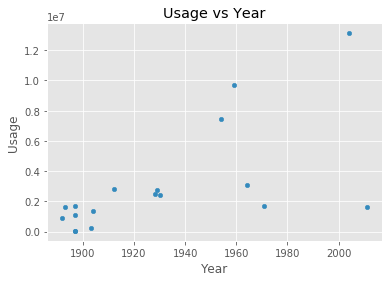

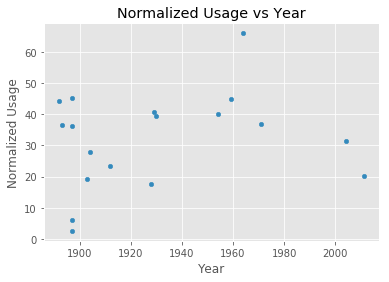

In [80]:
acadf.plot(x='Year', y='Usage', kind='scatter')
plt.title('Usage vs Year')
acadf.plot(x='Year', y='Normalized Usage', kind='scatter')
plt.title('Normalized Usage vs Year')

## Administrative Offices

In [89]:
admpc = pc[pc['Building Use'].str.contains('ADM', na=False)]
admlst = []
for i in admpc['Property Code']:
    admlst.append(i)

In [196]:
admdf = df[df.Code.isin(admlst)]
admdf = admdf.reset_index(drop=True)
admdf = admdf[admdf.Area != 0]

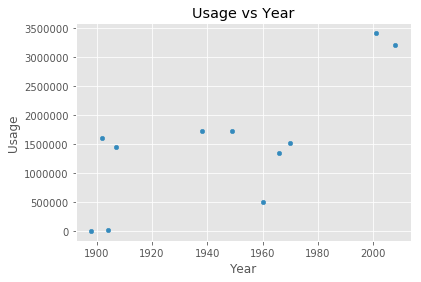

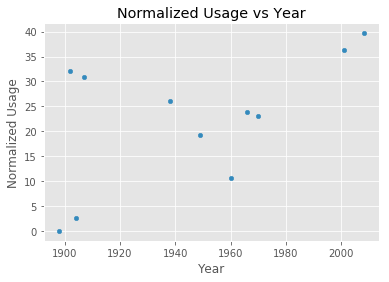

In [93]:
admdf.plot(x='Year', y='Usage', kind='scatter')
plt.title('Usage vs Year')
admdf.plot(x='Year', y='Normalized Usage', kind='scatter')
plt.title('Normalized Usage vs Year')

## Libraries

In [195]:
libpc = pc[pc['Building Use'].str.contains('Library', na=False)]
liblst = []
for i in libpc['Property Code']:
    liblst.append(i)

In [194]:
libdf = df[df.Code.isin(liblst)]
libdf = libdf.reset_index(drop=True)
libdf = libdf[libdf.Area != 0]

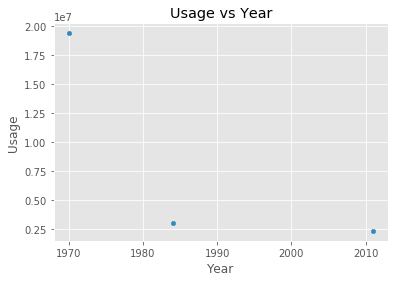

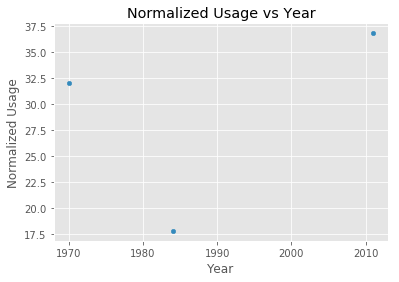

In [99]:
libdf.plot(x='Year', y='Usage', kind='scatter')
plt.title('Usage vs Year')
libdf.plot(x='Year', y='Normalized Usage', kind='scatter')
plt.title('Normalized Usage vs Year')

## Residential 

In [188]:
respc = pc[pc['Building Use'].str.contains('Residential', na=False)]
reslst = []
for i in respc['Property Code']:
    reslst.append(i)

In [193]:
resdf = df[df.Code.isin(reslst)]
resdf = resdf.reset_index(drop=True)

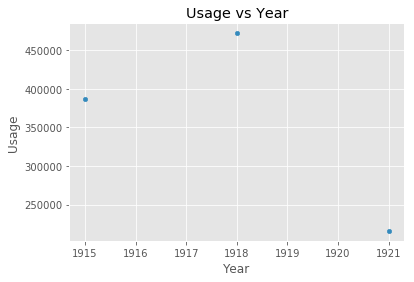

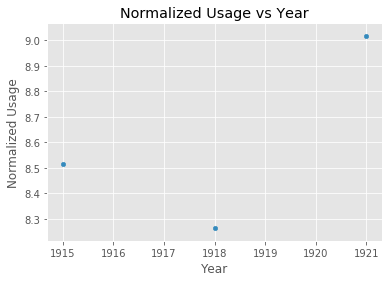

In [190]:
resdf.plot(x='Year', y='Usage', kind='scatter')
plt.title('Usage vs Year')
resdf.plot(x='Year', y='Normalized Usage', kind='scatter')
plt.title('Normalized Usage vs Year')

## Considering LEED Buildings

In [191]:
df2 = df.sort_values(by='Building', ascending=True)

In [192]:
leednames = ['Reva and David Logan Center for the Arts', 'Saieh Hall for Economics', 'Chicago Theological Seminary']
leedstat = ['LEED Gold', 'LEED Gold', 'LEED Gold']

In [158]:
leedata = {'Building': leednames, 'Certification': leedstat}
leedf = pd.DataFrame(leedata)

In [166]:
leedf = leedf.merge(df2, on='Building')

In [162]:
df3 = df2[df2.Building != 'Reva and David Logan Center for the Arts']
df3 = df3[df3.Building != 'Saieh Hall for Economics']
df3 = df3[df3.Building != 'Chicago Theological Seminary']

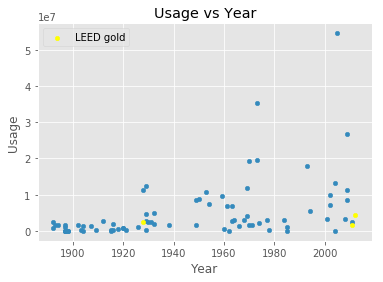

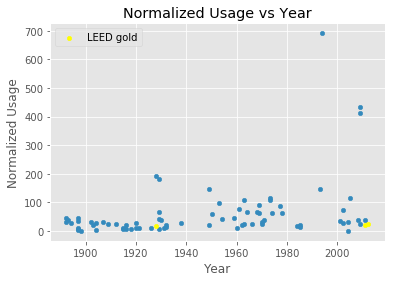

In [187]:
ax = df3.plot(x='Year', y='Usage', kind='scatter')
leedf.plot(ax=ax, x='Year', y='Usage', kind='scatter', color='yellow', label='LEED gold')
plt.title('Usage vs Year')

ax2 = df3.plot(x='Year', y='Normalized Usage', kind='scatter')
leedf.plot(ax=ax2, x='Year', y='Normalized Usage', kind='scatter', color='yellow', label='LEED gold')
plt.title('Normalized Usage vs Year')